In [1]:
from main.compiling.compilers.AncillaPerCheckCompiler import AncillaPerCheckCompiler
from main.compiling.noise.models.CircuitLevelNoise import CircuitLevelNoise
from main.compiling.syndrome_extraction.extractors.ancilla_per_check.mixed.CxCyCzExtractor import CxCyCzExtractor
from main.codes.tic_tac_toe.HoneycombCode import HoneycombCode
from main.codes.tic_tac_toe.gauge_honeycomb_code import GaugeHoneycombCode
from main.codes.tic_tac_toe.FloquetColourCode import FloquetColourCode
from main.codes.tic_tac_toe.TicTacToeCode import TicTacToeCode
from main.utils.enums import State
from main.building_blocks.pauli import Pauli
from main.building_blocks.pauli.PauliLetter import PauliLetter
import stim
import sinter 
import matplotlib.pyplot as plt
import numpy as np
from beliefmatching import BeliefMatchingSinterDecoder
from main.utils.Colour import Blue, Green, Red


# Load data

In [ ]:
#gauge_hcc_X0_samples = sinter.stats_from_csv_files('resume/GaugeHoneycombCodeX_0_2.json')
#hcc_X0_samples = sinter.stats_from_csv_files('resume/HoneycombCodeX_0_4.json')

samples = sinter.stats_from_csv_files('resume_14_2/data.csv')


# Logical error rate comparison

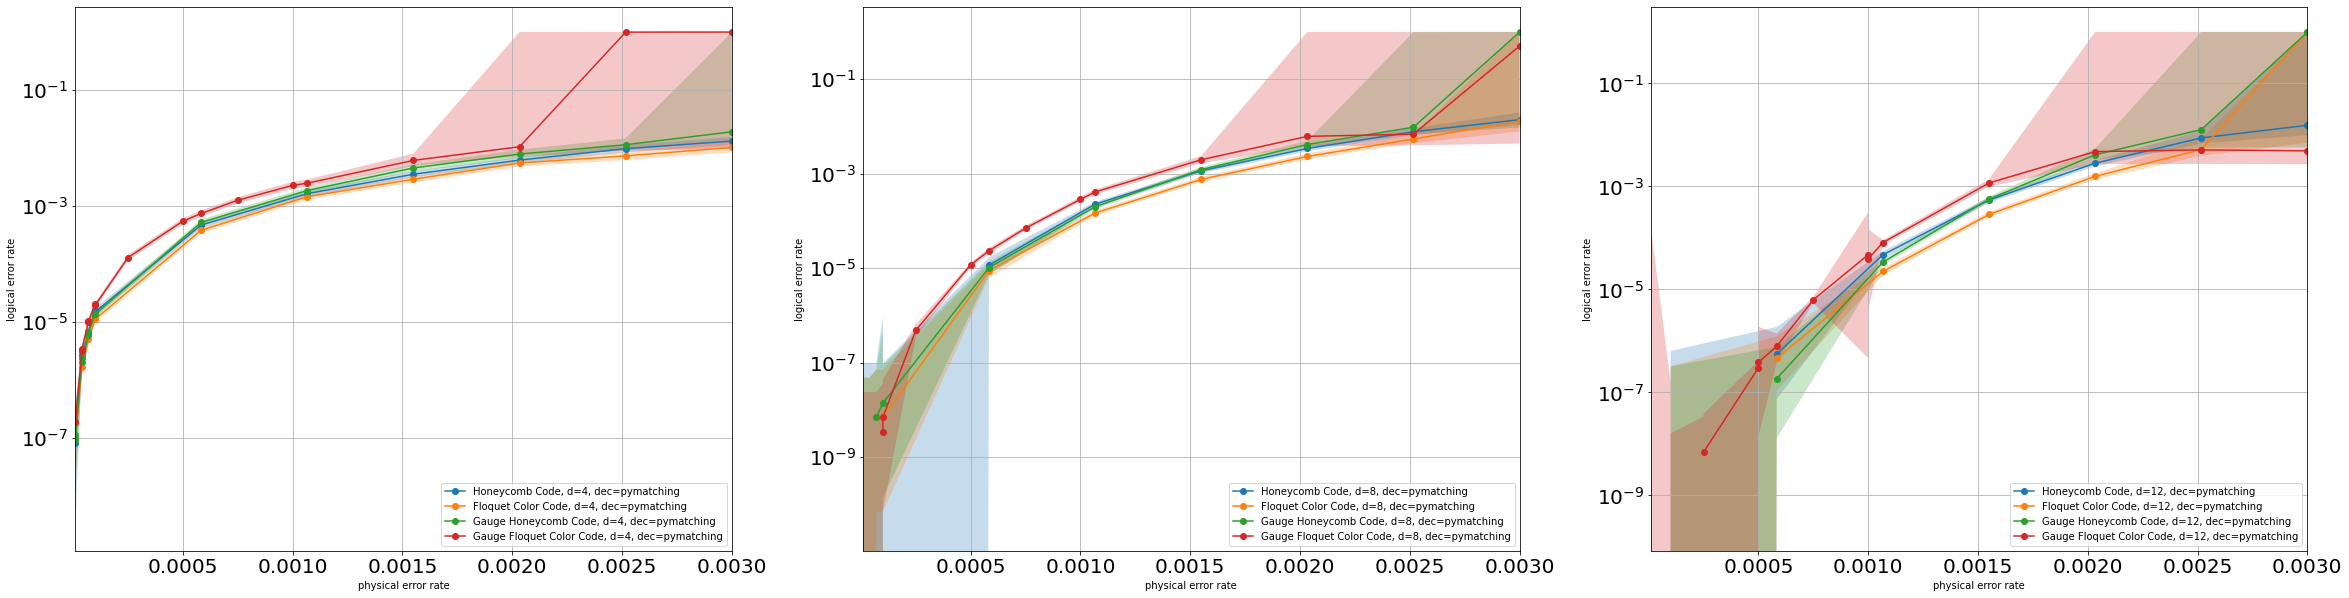

In [5]:
fig, axis = plt.subplots(1, 3,figsize=(40,10))

def plot_error_rate(ax, stats, group_func, distance,factor,code):#, filter_func, x_func):

    sinter.plot_error_rate(
        ax=ax,
        stats=stats,
        group_func=group_func,
        filter_func = lambda s : s.json_metadata['distance'] == distance and s.decoder == 'pymatching' and s.json_metadata['code'] == code,
        x_func=lambda stat: stat.json_metadata['p'],
        failure_units_per_shot_func=lambda stats: stats.json_metadata['total_measurement_rounds'])

plot_error_rate(axis[0], samples, lambda stat: f"Honeycomb Code, d={stat.json_metadata['distance']}, dec={stat.decoder}", 4, 1, "HoneycombCodeX")
plot_error_rate(axis[0], samples, lambda stat: f"Floquet Color Code, d={stat.json_metadata['distance']}, dec={stat.decoder}", 4,2, "FloquetColourCodeX")
plot_error_rate(axis[0], samples, lambda stat: f"Gauge Honeycomb Code, d={stat.json_metadata['distance']}, dec={stat.decoder}", 4,2, "GaugeHoneycombCodeX")
plot_error_rate(axis[0], samples, lambda stat: f"Gauge Floquet Color Code, d={stat.json_metadata['distance']}, dec={stat.decoder}",4, 4, "GaugeFloquetColourCodeX")


plot_error_rate(axis[1], samples, lambda stat: f"Honeycomb Code, d={stat.json_metadata['distance']}, dec={stat.decoder}", 8,4, "HoneycombCodeX")
plot_error_rate(axis[1], samples, lambda stat: f"Floquet Color Code, d={stat.json_metadata['distance']}, dec={stat.decoder}", 8,2, "FloquetColourCodeX")
plot_error_rate(axis[1], samples, lambda stat: f"Gauge Honeycomb Code, d={stat.json_metadata['distance']}, dec={stat.decoder}", 8,2, "GaugeHoneycombCodeX")
plot_error_rate(axis[1], samples, lambda stat: f"Gauge Floquet Color Code, d={stat.json_metadata['distance']}, dec={stat.decoder}", 8,1, "GaugeFloquetColourCodeX")

plot_error_rate(axis[2], samples, lambda stat: f"Honeycomb Code, d={stat.json_metadata['distance']}, dec={stat.decoder}", 12,2, "HoneycombCodeX")
plot_error_rate(axis[2], samples, lambda stat: f"Floquet Color Code, d={stat.json_metadata['distance']}, dec={stat.decoder}", 12,1, "FloquetColourCodeX")
plot_error_rate(axis[2], samples, lambda stat: f"Gauge Honeycomb Code, d={stat.json_metadata['distance']}, dec={stat.decoder}", 12, 1, "GaugeHoneycombCodeX")
plot_error_rate(axis[2], samples, lambda stat: f"Gauge Floquet Color Code, d={stat.json_metadata['distance']}, dec={stat.decoder}", 12, 1, "GaugeFloquetColourCodeX")

#plot_error_rate(axis[3], hcc_X1_samples, lambda stat: f"Honeycomb Code, d={stat.json_metadata['distance']}, dec={stat.decoder}", 16,2)
#plot_error_rate(axis[3], fcc_X1_samples, lambda stat: f"Floquet Color Code, d={stat.json_metadata['distance']}, dec={stat.decoder}", 16,1)
#plot_error_rate(axis[3], gauge_hcc_X1_samples, lambda stat: f"Gauge Honeycomb Code, d={stat.json_metadata['distance']}, dec={stat.decoder}", 16)
#plot_error_rate(axis[3], gauge_fcc_X1_samples, lambda stat: f"Gauge Floquet Color Code, d={stat.json_metadata['distance']}, dec={stat.decoder}", 16)

for ax in axis:
    ax.set_yscale('log')
    ax.set_xlabel('physical error rate')
    ax.set_ylabel('logical error rate')
    ax.legend(loc='lower right')
#    ax.set_yticks([0.01,0.05, 0.1,0.15])
    ax.grid()
    ax.set_xlim(0.00001, 0.003)
    # increase font size legend
    
    ax.tick_params(axis='both', which='major', labelsize=20)

# Threshold comparison

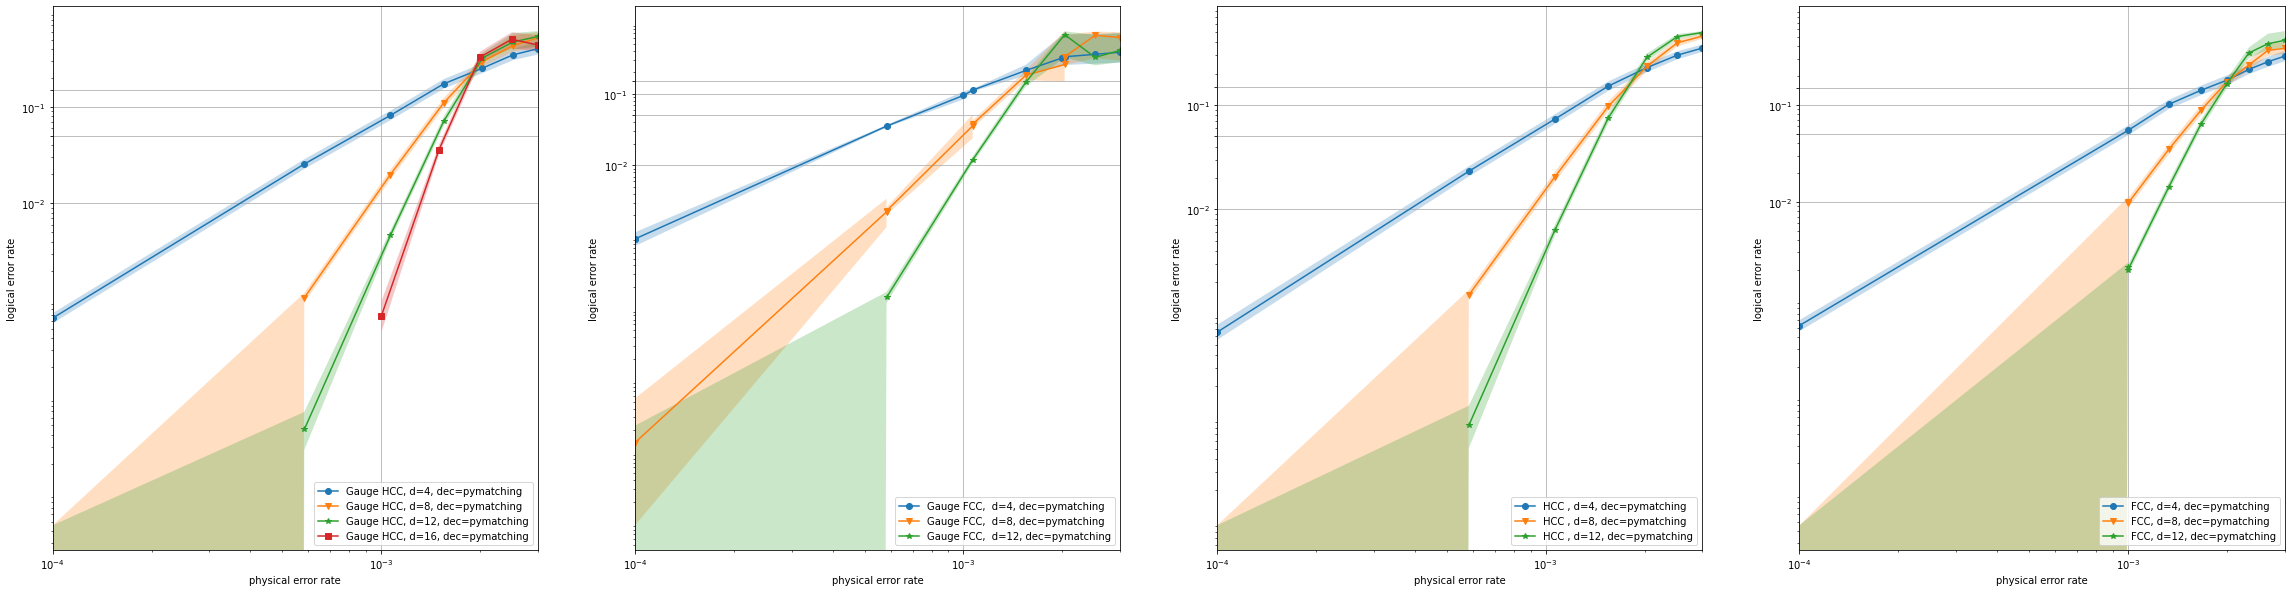

In [12]:
fig, axis = plt.subplots(1, 4,figsize=(40,10))


sinter.plot_error_rate(
    ax=axis[0],
    stats=gauge_hcc_X1_samples,
    group_func=lambda stat: f"Gauge HCC, d={stat.json_metadata['distance']}, dec={stat.decoder}",
    x_func=lambda stat: stat.json_metadata['p'],
    failure_units_per_shot_func=lambda stats: stats.json_metadata['r']/2)

sinter.plot_error_rate(
    ax=axis[1],
    stats=gauge_fcc_X1_samples,
    group_func=lambda stat: f"Gauge FCC,  d={stat.json_metadata['distance']}, dec={stat.decoder}",
    filter_func=lambda s: s.decoder == 'pymatching',
    x_func=lambda stat: stat.json_metadata['p'],
    failure_units_per_shot_func=lambda stats: stats.json_metadata['r'])

sinter.plot_error_rate(
    ax=axis[2],
    stats=hcc_X1_samples,
    group_func=lambda stat: f"HCC , d={stat.json_metadata['distance']}, dec={stat.decoder}",
    x_func=lambda stat: stat.json_metadata['p'],
    failure_units_per_shot_func=lambda stats: stats.json_metadata['r']/4)

sinter.plot_error_rate(
    ax=axis[3],
    stats=fcc_X1_samples,
    group_func=lambda stat: f"FCC, d={stat.json_metadata['distance']}, dec={stat.decoder}",
    x_func=lambda stat: stat.json_metadata['p'],
    failure_units_per_shot_func=lambda stats: stats.json_metadata['r']/2)

#"""
for ax in axis:
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel('physical error rate')
    ax.set_ylabel('logical error rate')
    ax.legend(loc='lower right')
    ax.set_yticks([0.01,0.05, 0.1,0.15])
    ax.grid()
    ax.set_xlim(0.0001, 0.003)



# Teraquop plots

NameError: name 'gauge_hcc_X0_samples' is not defined

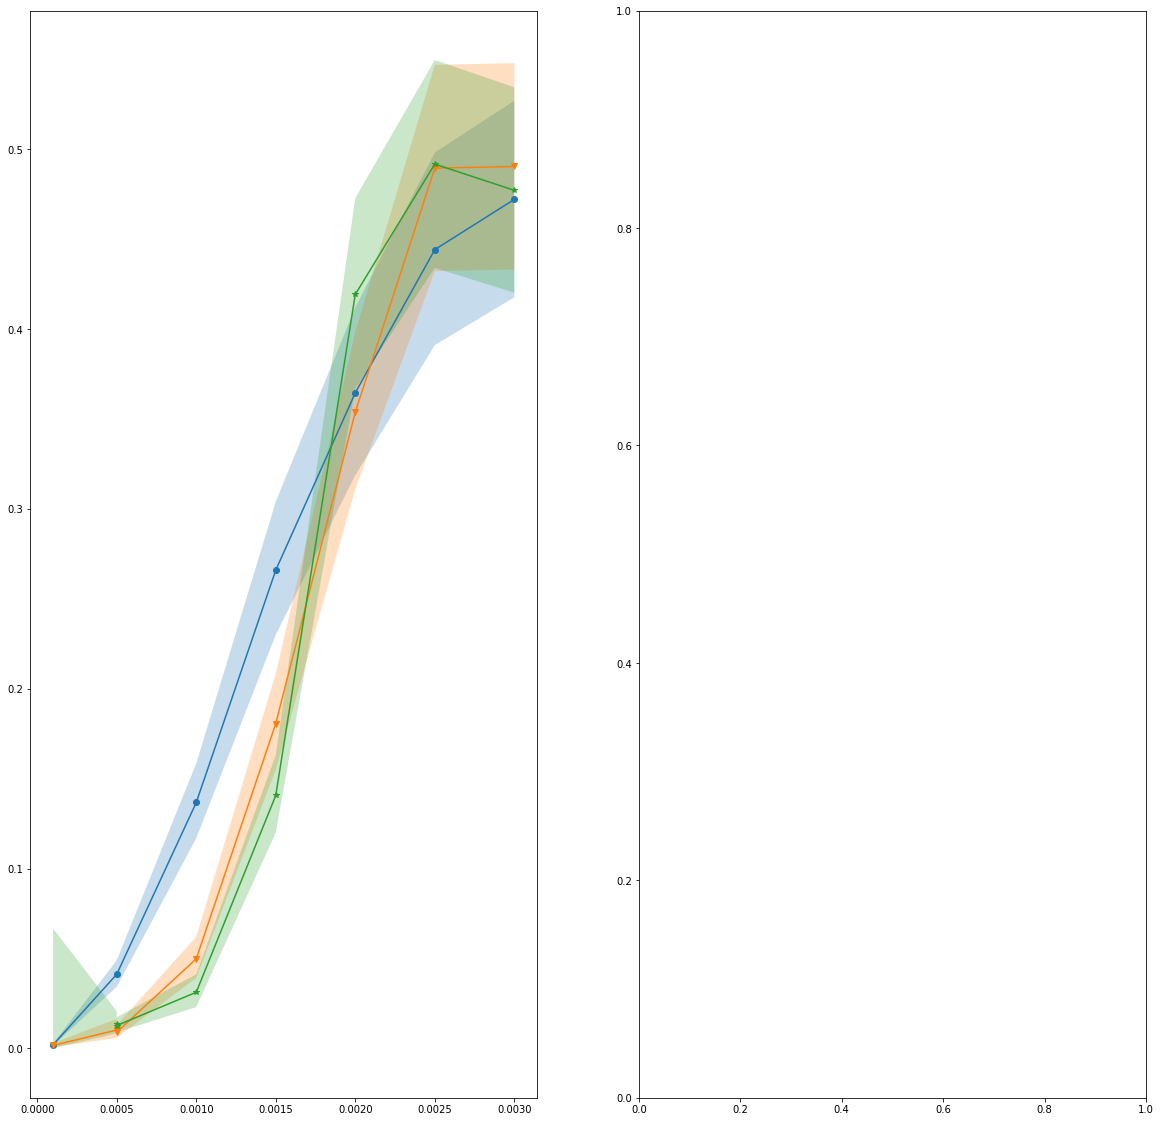

In [71]:
fig, axis = plt.subplots(1, 2,figsize=(20,20))
sinter.plot_error_rate(
        ax=axis[0],
        stats=hcc_X1_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        filter_func=lambda s: s.decoder == 'pymatching',
        x_func=lambda stat: stat.json_metadata['p'])

sinter.plot_error_rate(
        ax=axis[1],
        stats=gauge_hcc_X0_samples,
        group_func=lambda stat: f"GaugeHoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        filter_func=lambda s: s.decoder == 'pymatching',
        x_func=lambda stat: stat.json_metadata['p'])

#print(hcc_samples)
# add a grid to the plot
for ax in axis:
    ax.set_xlim(0.001, 0.003)
    ax.set_yscale('log')
    ax.set_xlabel('physical error rate')
    ax.set_ylabel('logical error rate')
    ax.legend(loc='lower right')
    # add more ticks to the y-axis
    ax.set_yticks([0.01,0.05, 0.1,0.15])
    ax.grid()

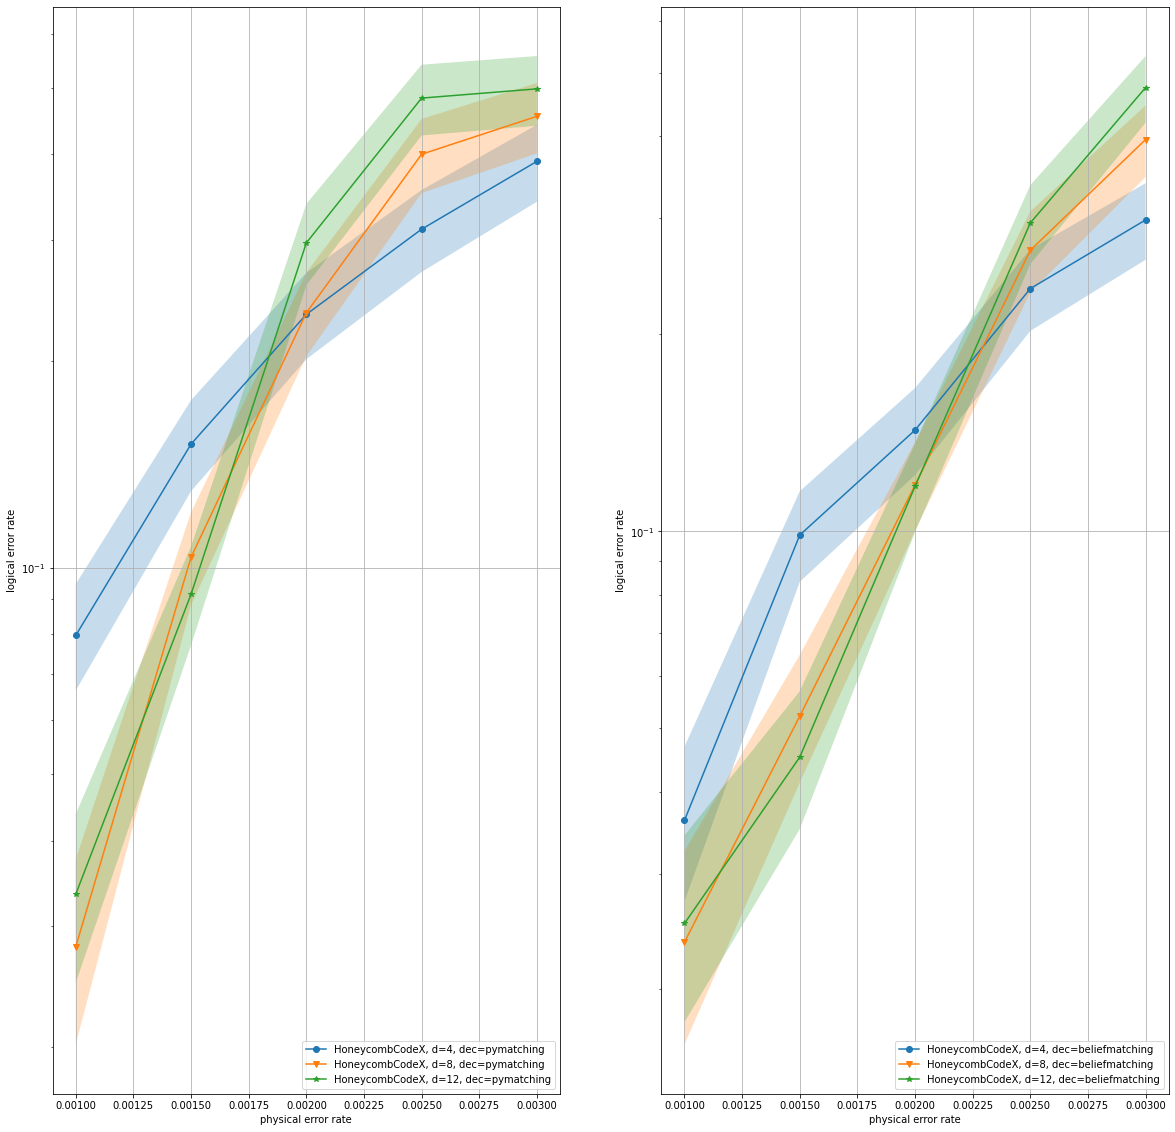

In [ ]:
fig, axis = plt.subplots(1, 2,figsize=(20,20))
sinter.plot_error_rate(
        ax=axis[0],
        stats=hcc_X0_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        filter_func=lambda s: s.decoder == 'pymatching',
        x_func=lambda stat: stat.json_metadata['p'])

sinter.plot_error_rate(
        ax=axis[1],
        stats=hcc_X0_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        filter_func=lambda s: s.decoder == 'beliefmatching',
        x_func=lambda stat: stat.json_metadata['p'])

#print(hcc_samples)
for ax in axis:
    ax.set_yscale('log')
    ax.set_xlabel('physical error rate')
    ax.set_ylabel('logical error rate')
    ax.legend(loc='lower right')
    ax.grid()

NameError: name 'gauge_hcc_X0_samples' is not defined

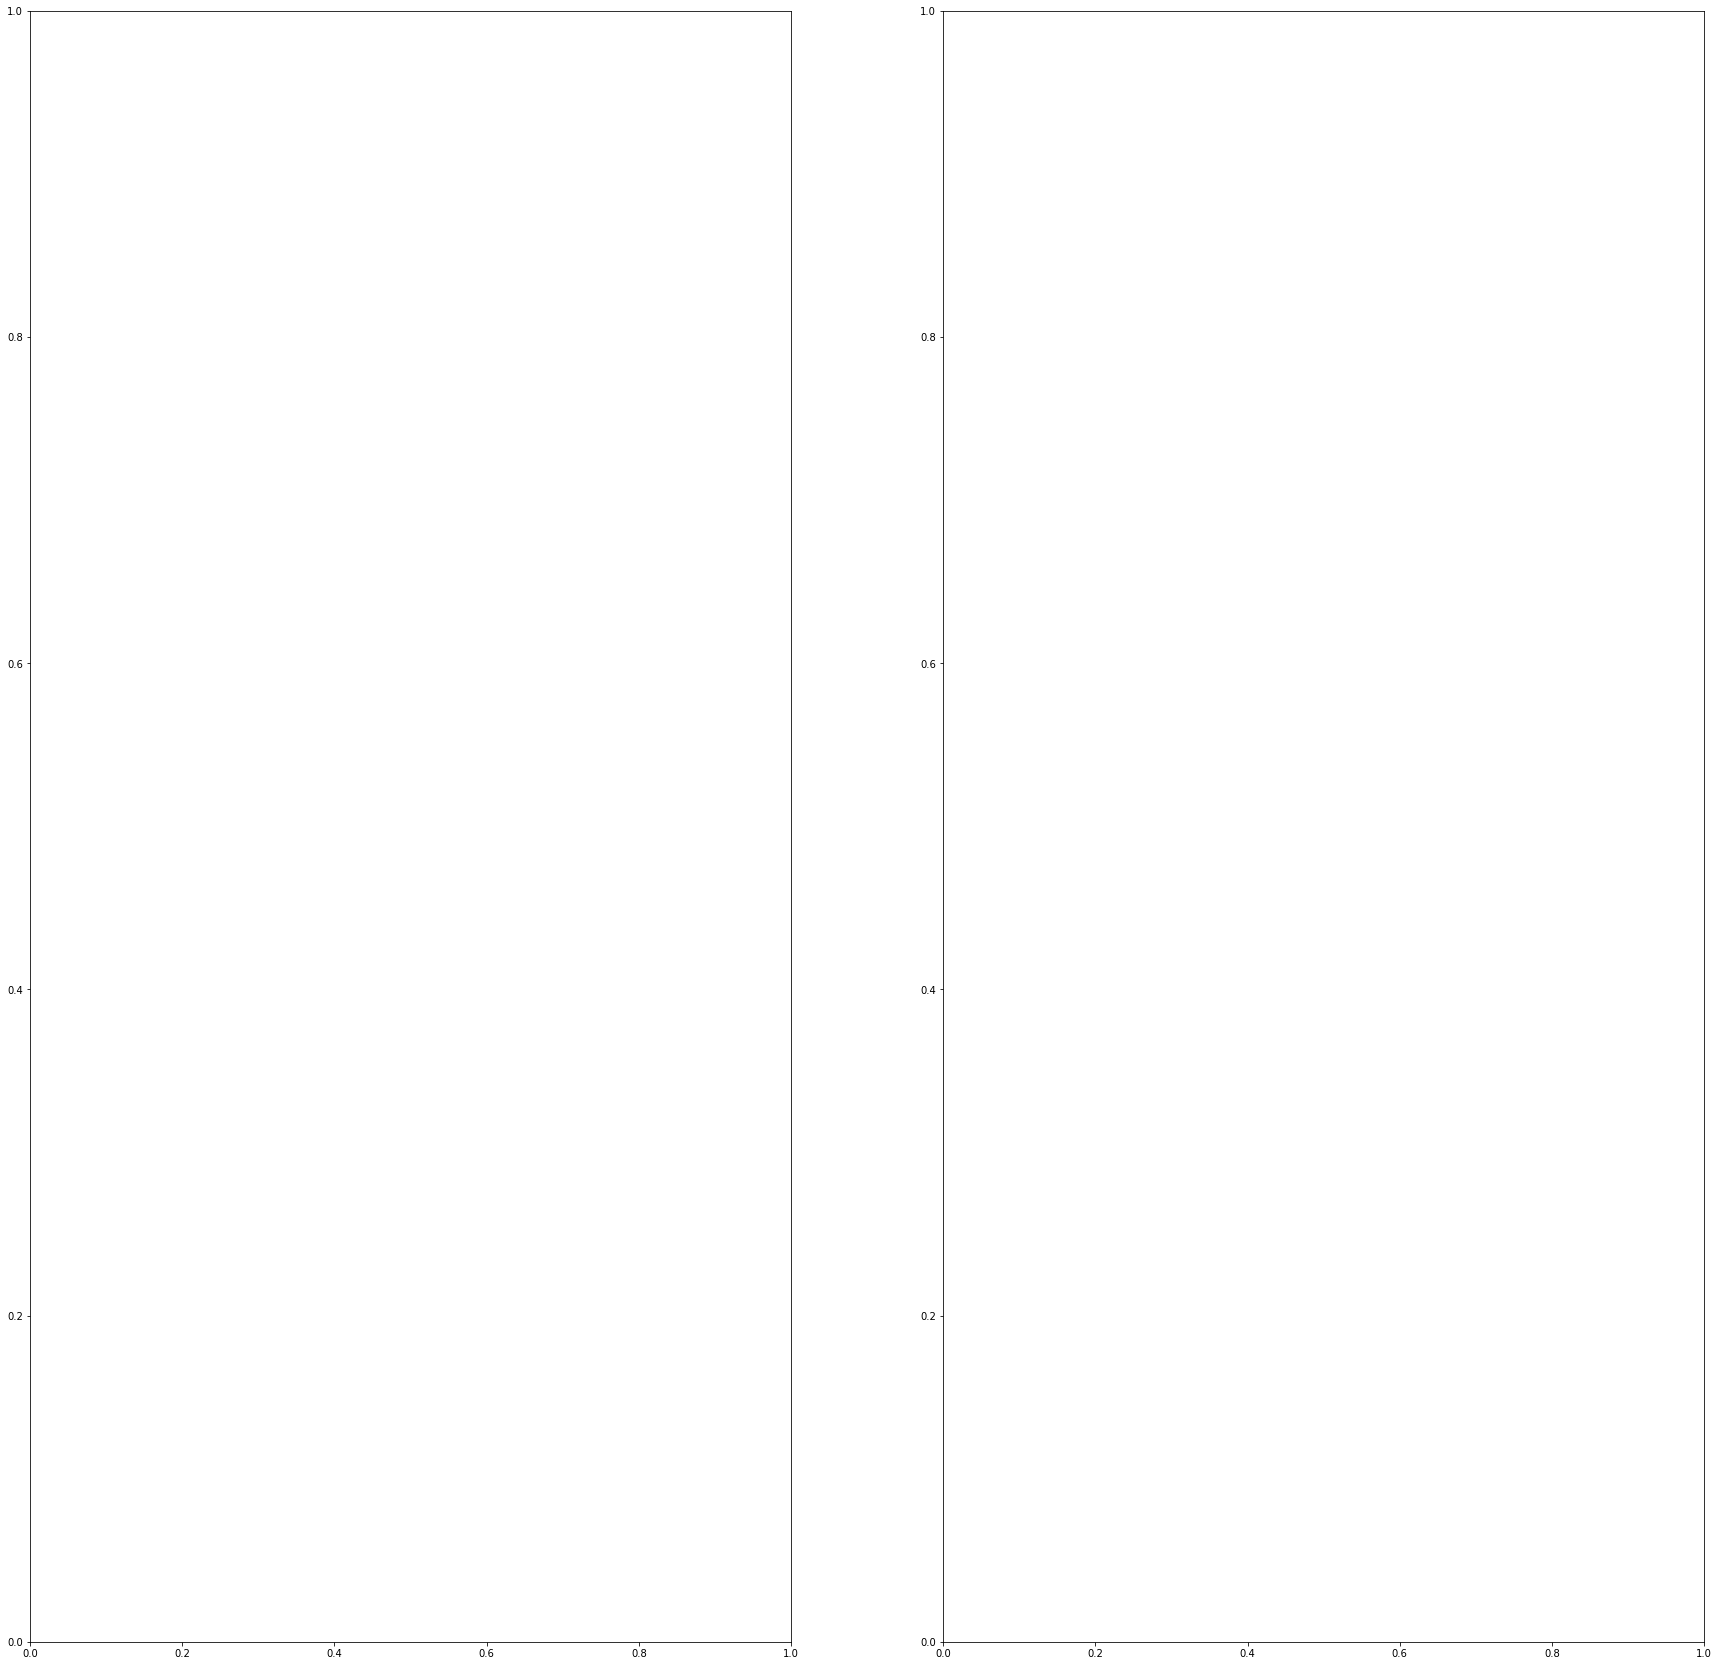

In [ ]:
fig, axis = plt.subplots(1, 2,figsize=(30,30))
sinter.plot_error_rate(
        ax=axis[0],
        stats=gauge_hcc_X0_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        #filter_func=lambda s: s.decoder == 'pymatching',
        x_func=lambda stat: stat.json_metadata['p'])

sinter.plot_error_rate(
        ax=axis[1],
        stats=gauge_hcc_X0_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        filter_func=lambda s: s.decoder == 'beliefmatching',
        x_func=lambda stat: stat.json_metadata['p'])

#print(hcc_samples)
for ax in axis:
    ax.set_yscale('log')
    ax.set_xlabel('physical error rate')
    ax.set_ylabel('logical error rate')
    ax.legend(loc='lower right')
    ax.grid()

In [ ]:
sinter.plot_error_rate(
        ax=axis[0],
        stats=hcc_X0_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        filter_func=lambda s: s.decoder == 'beliefmatching',
        x_func=lambda stat: stat.json_metadata['p'])

sinter.plot_error_rate(
        ax=axis[1],
        stats=gauge_hcc_X0_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        filter_func=lambda s: s.decoder == 'beliefmatching',
        x_func=lambda stat: stat.json_metadata['p'])

In [ ]:
hcc_circuit.detector_error_model(decompose_errors=True, approximate_disjoint_errors=True).diagram(type="match-graph-3d")

In [ ]:
hcc_Z0_samples = calculate_threshold('HoneycombCodeZ',[4,8,12],0,2,np.zeros(10), np.zeros(10),np.logspace(-2.2,-1.9,10),np.zeros(10))
hcc_Z1_samples = calculate_threshold('HoneycombCodeZ',[4,8,12],1,2,np.zeros(10), np.zeros(10),np.logspace(-2.2,-1.9,10),np.zeros(10))

|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.5s (410.29/s)                                        ta: 0s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (563.92/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (610.27/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (718.99/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (709.17/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (699.80/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (664.03/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (622.34/s)                                        
|███████████████

Starting workers...
30 cases left:
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.00630957344480193}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.00630957344480193}
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.006812920690579608}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.006812920690579608}
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.007356422544596414}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers

|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (728.45/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (710.03/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (726.22/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (712.66/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (725.65/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (724.16/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (795.35/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (778.50/s)                                        
|███████████████████████

Starting workers...
30 cases left:
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.00630957344480193}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.00630957344480193}
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.006812920690579608}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.006812920690579608}
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.007356422544596414}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers